Analyzing IPL data from 2008 to 2019. 
Motivation for this is to answer below questions: 
Which is the best performing team in IPL history, based on total number of titles and matches won?
How toss affects the outcome of the game?
Which overs are best to score runs and which ones give most number of wickets for bowlers?

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#import csv files
matches_df = pd.read_csv("matches.csv")
deliveries_df = pd.read_csv("deliveries.csv")


In [ ]:
#Cleaning Matches data
#questions we want to answer are not related to Umpires so we can delete umpire columns
#there is some datatype issue as well so lets see what all we need to change in the data

In [3]:
matches_df.info()
matches_df = matches_df.sort_values(['season', 'id'], ascending = (True, True))
#matches_df.to_csv("new_matches.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [38]:
matches_df['season']

59     2008
60     2008
61     2008
62     2008
63     2008
       ... 
751    2019
752    2019
753    2019
754    2019
755    2019
Name: season, Length: 756, dtype: int64

In [4]:
#Clearly we can delete Umpire columns
#There is date column which is of the type object, changing the datatype to datetime
matches_df = matches_df.drop(['umpire1', 'umpire2', 'umpire3'], axis = 1)
matches_df['date'] = matches_df['date'].astype('datetime64')

In [5]:
#we can see there are only 4 missing values in winner and player of match , and 7 in city. we will see how best we can fill these missing value.
matches_df[matches_df.isnull().any(axis=1)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium


In [6]:
#in case of winner and player of match columns null value is for matches where there was no result, impumting these null value by "No result"
#we will delete city coulmn as well
matches_df = matches_df.drop(['city'], axis = 1)
matches_df['winner'].fillna("no result", inplace = True)
matches_df['player_of_match'].fillna("no result", inplace = True)


In [43]:
#A lot of franchises were renamed and dissaolved during the course of 12 years. Lets see which team names are present in the data set.
#we will rename the teams with the longest used names for consistency
matches_df['team1'].nunique()


11

In [41]:
#we have 15 unique team names in data set.
#Delhi Daredevils and Delhi Capitals are from same city "Delhi", we will consider them as 1 franchise and rename Delhi Capitals as Delhi Daredevils
#Sunrisers Hyderabad and Decan Chargers are from same city "Delhi", we will consider them as 1 franchise and rename Decan Chargers as Sunrisers Hyderabad
#Pune Warriors, Rising Pune Supergiant and Rising Pune Supergiants are from same city , we will name them as Rising Pune Supergiants
matches_df.replace("Delhi Capitals", "Delhi Daredevils", inplace = True)
matches_df.replace(to_replace = "Deccan Chargers", value = "Sunrisers Hyderabad", inplace = True)
matches_df.replace("Rising Pune Supergiant", "Rising Pune Supergiants", inplace = True)
matches_df.replace("Pune Warriors", "Rising Pune Supergiants", inplace = True)

In [ ]:
#Cleaning deliveries data
#questions we want to answer are not related to Umpires so we can delete umpire columns
#there is some datatype issue as well so lets see what all we need to change in the data

In [44]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [45]:
#to treat null values in last three columns player_dismissed, dismissal kind and fielder, we will add N/A as these are instances where no wicket fell or if it did not fielder was involved like in cases of bowled or leg before wicket
deliveries_df['player_dismissed'].fillna("N/A", inplace= True)
deliveries_df['dismissal_kind'].fillna("N/A", inplace= True)
deliveries_df['fielder'].fillna("N/A", inplace= True)

In [46]:
#we have 15 unique team names in data set.
#Delhi Daredevils and Delhi Capitals are from same city "Delhi", we will consider them as 1 franchise and rename Delhi Capitals as Delhi Daredevils
#Sunrisers Hyderabad and Decan Chargers are from same city "Delhi", we will consider them as 1 franchise and rename Decan Chargers as Sunrisers Hyderabad
#Pune Warriors, Rising Pune Supergiant and Rising Pune Supergiants are from same city , we will name them as Rising Pune Supergiants
deliveries_df.replace("Delhi Capitals", "Delhi Daredevils", inplace = True)
deliveries_df.replace(to_replace = "Deccan Chargers", value = "Sunrisers Hyderabad", inplace = True)
deliveries_df.replace("Rising Pune Supergiant", "Rising Pune Supergiants", inplace = True)
deliveries_df.replace("Pune Warriors", "Rising Pune Supergiants", inplace = True)

In [47]:
#question 1: Which is the best performing team in IPL history. There can be sevaral ways to answer this question, I am using the method 1. where the team which wins most number of games irrespective of titles is the best performing team, 2. Team with most number of titles
#to answer using first method we need to find the team which won most number of games.we can achieve that by doing a groupby and count on winner coulmn from matches dataframe
winners = matches_df.groupby(['winner'])['winner'].count()
winners.sort_values(ascending = False)


winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Daredevils                77
Rajasthan Royals                75
Rising Pune Supergiants         27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
no result                        4
Name: winner, dtype: int64

In [48]:
winners_df = matches_df.groupby('season').nth([-1])

In [49]:
#clearly Mumbai Indians comes out to be a supirior team franchise here as well with 4 title wins.
winners_df.groupby(['winner'])['winner'].count().sort_values(ascending = False)

winner
Mumbai Indians           4
Chennai Super Kings      3
Sunrisers Hyderabad      2
Kolkata Knight Riders    2
Rajasthan Royals         1
Name: winner, dtype: int64

In [53]:
matches_df['Toss_effect'] = 0
matches_df.head()

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Toss_effect
59,60,2008,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,0
60,61,2008,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0
61,62,2008,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,0
62,63,2008,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,0
63,64,2008,2008-04-20,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,0


In [54]:
#Lets check toss effects outcome of the game
for i in matches_df.index:
    if matches_df['toss_winner'][i] == matches_df['winner'][i]:
        matches_df['Toss_effect'][i] = 1
matches_df.head()

<ipython-input-54-9d06b2b54e35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_df['Toss_effect'][i] = 1


,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Toss_effect
59,60,2008,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,0
60,61,2008,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",1
61,62,2008,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,0
62,63,2008,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,0
63,64,2008,2008-04-20,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,0


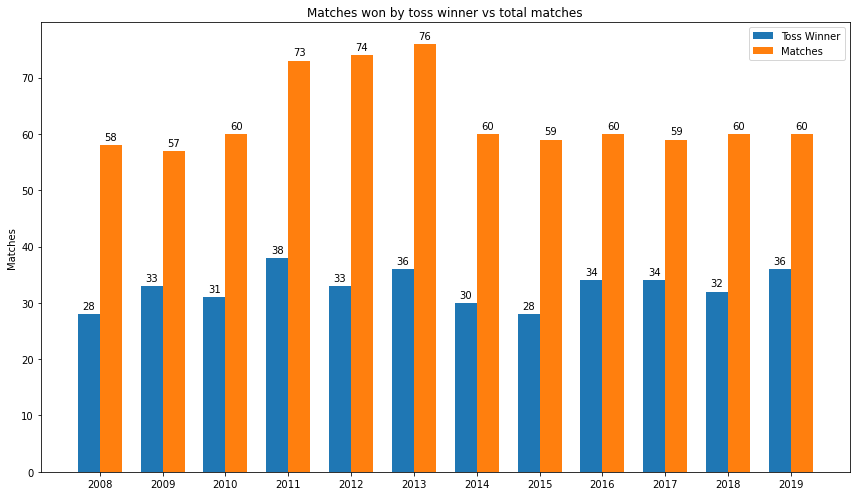

In [59]:
toss =matches_df.groupby(['season'])['Toss_effect'].sum()
matches = matches_df.groupby(['season'])['season'].count()
labels = np.arange(2008, 2020, 1)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (12,7))
rects1 = ax.bar(x - width/2, toss, width, label='Toss Winner')
rects2 = ax.bar(x + width/2, matches, width, label='Matches')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Matches')
ax.set_title('Matches won by toss winner vs total matches')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [ ]:
#we can see there is not much effect of toss, in most of the seasons result is around 50% is favour of toss winner. 

In [111]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,N/A,N/A,N/A
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,N/A,N/A,N/A
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,N/A,N/A,N/A
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,N/A,N/A,N/A
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,N/A,N/A,N/A


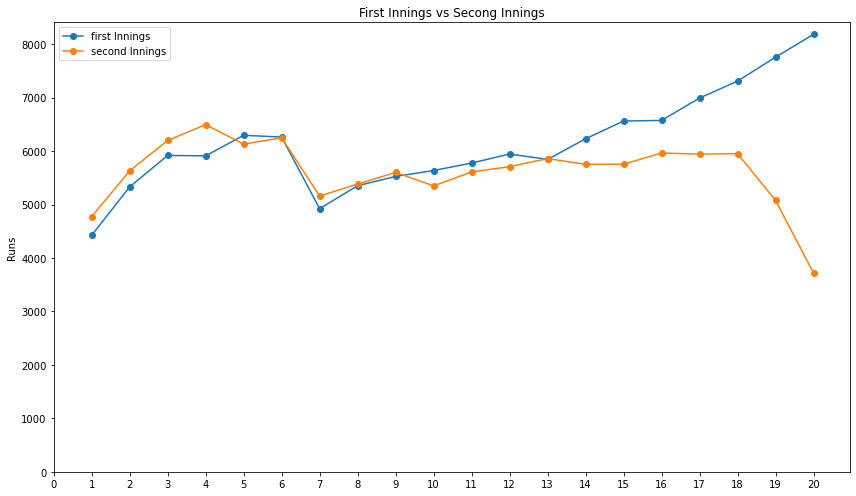

In [65]:
labels = np.arange(0, 21, 1)
over_runs = deliveries_df.groupby(['inning', 'over'])['total_runs'].sum()
inning1 = over_runs[1]
inning2 = over_runs[2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (12,7))
rects1 = ax.plot(inning1,marker = 'o', label='first Innings')
rects2 = ax.plot(inning2, marker= 'o', label='second Innings')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runs')
ax.set_title('First Innings vs Secong Innings')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0)

fig.tight_layout()
plt.show()

In [62]:
ind = list()
for i in deliveries_df.index:
    if deliveries_df['player_dismissed'][i] != 'N/A':
        ind.append(i)

wickets_df = deliveries_df.loc[ind, :]
    

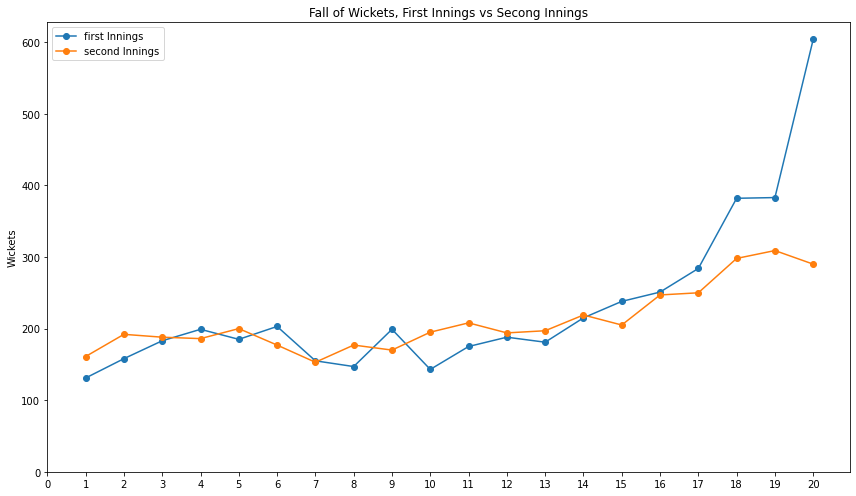

In [64]:
labels = np.arange(0, 21, 1)
wickets = wickets_df.groupby(['inning', 'over'])['player_dismissed'].count()
inning1 = wickets[1]
inning2 = wickets[2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (12,7))
rects1 = ax.plot(inning1,marker = 'o', label='first Innings')
rects2 = ax.plot(inning2, marker= 'o', label='second Innings')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Wickets')
ax.set_title('Fall of Wickets, First Innings vs Secong Innings')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0)

fig.tight_layout()
plt.show()